In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


In [2]:
Stations_df = pd.read_csv('data/naiades_export/France_entiere/Stations/StationMesureEauxSurface.csv', sep=',', header=0)

/tmp/ipykernel_2161977/1920941742.py:1: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  Stations_df = pd.read_csv('data/naiades_export/France_entiere/Stations/StationMesureEauxSurface.csv', sep=',', header=0)


In [3]:
print(Stations_df.columns)


Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface',
       'DateCreationStationMesureEauxSurface',
       'DateMAJInfosStationMesureEauxSurface', 'StStationMesure',
       'NomStationMesureEauxSurface', 'FinaliteStationMesureEauxSurface',
       'LocPreciseStationMesureEauxSurface',
       'CarteLocStationMesureEauxSurface', 'SchemaLocStationMesureEauxSurface',
       'AltitudePointCaracteritisque', 'SuperficieBassinVersantTopo',
       'SuperficieBassinVersantReel', 'PremierMoisAnneeEtiage',
       'PkPointTronconEntiteHydroPrincipale',
       'DateArretActiviteStationMesureEauxSurface',
       'ComStationMesureEauxSurface',
       'ModeObtentionCoordStationMesureEauxSurface',
       'NatureStationMesureEauxSurface', 'ClasseDurete', 'CdMasseDEau',
       'CdEntiteHydrographique', 'CdTronconHydrographique', 'CdCommune',
       'CdBassin', 'DateDuJeuDeDonnee', 'ProducteurDuJeu',
       'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface',
       'ProjStation

In [4]:
print(Stations_df['ProjStationMesureEauxSurface'].head(20))


0     41
1     41
2     41
3     41
4     41
5     41
6     41
7     41
8     41
9     41
10    41
11    41
12    41
13    41
14    41
15    41
16    41
17    41
18    41
19    39
Name: ProjStationMesureEauxSurface, dtype: int64


In [5]:
print(Stations_df['ProjStationMesureEauxSurface'].unique())


[41 39 26 40 38]


In [6]:
count_df = Stations_df['ProjStationMesureEauxSurface'].value_counts()
print(count_df)


26    34689
40      296
38      216
39      153
41       65
Name: ProjStationMesureEauxSurface, dtype: int64


#### Je constitue une liste des noms de station dont la projection n'est pas la principale (il faudra enlever ces stations du dataset Analyse)

In [7]:
Stations_mauvaise_proj = Stations_df[Stations_df['ProjStationMesureEauxSurface'] != 26]
Stations_mauvaise_proj = Stations_mauvaise_proj[['LbStationMesureEauxSurface']]
Stations_mauvaise_proj = Stations_mauvaise_proj.drop_duplicates()
print(len(Stations_mauvaise_proj))


699


In [8]:
Stations_df = Stations_df[~Stations_df['LbStationMesureEauxSurface'].isin(Stations_mauvaise_proj['LbStationMesureEauxSurface'])]


In [9]:
Stations_df = Stations_df[['LbStationMesureEauxSurface', 'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface']]

unique_values = Stations_df['LbStationMesureEauxSurface'].unique()
print("nb de station : ",len(unique_values))
# print(unique_values)


nb de station :  32513


In [10]:
print(Stations_df[['CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface']].head(4))


    CoordXStationMesureEauxSurface  CoordYStationMesureEauxSurface
68                        758262.0                       6981286.0
69                        728499.0                       6876584.0
70                        730436.0                       6558304.0
71                        714079.0                       6558750.0


In [11]:
# Convert DataFrame to GeoDataFrame
# Assuming 'CoordXStationMesureEauxSurface' is longitude and 'CoordYStationMesureEauxSurface' is latitude
gdf_stations = gpd.GeoDataFrame(
    Stations_df,
    geometry=gpd.points_from_xy(Stations_df.CoordXStationMesureEauxSurface, Stations_df.CoordYStationMesureEauxSurface)
)

# Set the coordinate reference system (CRS) for the GeoDataFrame
# Lamber-93 EPSG is 2154
gdf_stations.set_crs(epsg=2154, inplace=True)

# Now you can work with your GeoDataFrame
print(gdf_stations.head())

        LbStationMesureEauxSurface  CoordXStationMesureEauxSurface  \
68         PRISE D'EAU DANS L'OISE                        758262.0   
69       PRISE D'EAU DANS LA MARNE                        728499.0   
70  PRISE SURFACE CLAUDE DECLOITRE                        730436.0   
71            MAZERIER - LA VERNUE                        714079.0   
72           CUSSET - L'ARDOISIERE                        739549.0   

    CoordYStationMesureEauxSurface                        geometry  
68                       6981286.0  POINT (758262.000 6981286.000)  
69                       6876584.0  POINT (728499.000 6876584.000)  
70                       6558304.0  POINT (730436.000 6558304.000)  
71                       6558750.0  POINT (714079.000 6558750.000)  
72                       6551666.0  POINT (739549.000 6551666.000)  


### Loading the shapefile


   gid  CdHER1            NomHER1  \
0    1      16              CORSE   
1    2      12         ARMORICAIN   
2    3      13             LANDES   
3    4      14  COTEAUX AQUITAINS   
4    5       1           PYRENEES   

                                            geometry  
0  POLYGON ((1224414.391 6233078.083, 1224660.689...  
1  POLYGON ((286251.700 6842481.991, 286094.051 6...  
2  MULTIPOLYGON (((384703.699 6501954.878, 384958...  
3  POLYGON ((382383.410 6499256.885, 382698.338 6...  
4  POLYGON ((366221.881 6259724.762, 371565.281 6...  


<AxesSubplot:>

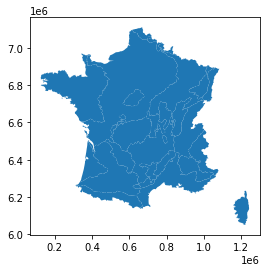

In [12]:
# Load the shapefile
gdf_regions = gpd.read_file("/home/orfeu/Documents/cours/3A/Cours_d_eau/Projet-cours-d-eau/Projet-cours-d-eau/data/naiades_export/HER//Hydroecoregion1.shp")

# Reproject to Lambert-93
gdf_regions = gdf_regions.to_crs(epsg=2154)


# View the first few records
print(gdf_regions.head())


# Plotting the regions (optional, for visualization)
gdf_regions.plot()

### Utiliser la map shapefile pour ajouter les HER au dataframe Station

In [13]:
# Perform a spatial join
joined = gpd.sjoin(gdf_stations, gdf_regions, how="inner", op='within')

# Check the result
print(joined.head())


        LbStationMesureEauxSurface  CoordXStationMesureEauxSurface  \
68         PRISE D'EAU DANS L'OISE                        758262.0   
69       PRISE D'EAU DANS LA MARNE                        728499.0   
272          COULONGE SUR CHARENTE                        414916.0   
273          COULONGE SUR CHARENTE                        414916.0   
274  CANAL DE L'UNIMA SUD-CHARENTE                        397732.0   

     CoordYStationMesureEauxSurface                        geometry  \
68                        6981286.0  POINT (758262.000 6981286.000)   
69                        6876584.0  POINT (728499.000 6876584.000)   
272                       6538509.0  POINT (414916.000 6538509.000)   
273                       6538509.0  POINT (414916.000 6538509.000)   
274                       6543039.0  POINT (397732.000 6543039.000)   

     index_right  gid  CdHER1           NomHER1  
68            19   20       9  TABLES CALCAIRES  
69            19   20       9  TABLES CALCAIRES  
27

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


### Exploration du dataframe avec les Stations et leur HER 

In [16]:
joined_cleaned = joined[['NomHER1', 'LbStationMesureEauxSurface']]

joined_cleaned = joined_cleaned.drop_duplicates(subset='LbStationMesureEauxSurface')

print("nb stations : ",len(joined_cleaned))

nb stations :  32385
                         NomHER1                   LbStationMesureEauxSurface
26299          COTEAUX AQUITAINS          Le Laussou au niveau de Monflanquin
21709      JURA-PREALPES DU NORD            SECHET A LA-CHAPELLE-D'ABONDANCE 
28145                 ARMORICAIN                  LOCH A LOCMARIA-GRAND-CHAMP
13862           TABLES CALCAIRES                       RAU DE COLONGE A RAHAY
32989                   PYRENEES                           REBENTY A MERIAL 1
5001          MASSIF CENTRAL SUD         Le Moulinet au niveau de Decazeville
5015          MASSIF CENTRAL SUD  Le Ruisseau de la Daze au niveau d'Espeyrac
1826         COTES CALCAIRES EST         ANNEXE DE LA MEUSE À LETANNE (PINAY)
16772      JURA-PREALPES DU NORD                          SERAN A TALISSIEU 1
32356           TABLES CALCAIRES                       L'ARMANCE A CHAOURCE 2
21886              MEDITERRANEEN                LE PRECONIL A SAINTE-MAXIME 3
23376           TABLES CALCAIRES      LE RU